## **Patricia Dewinta W 164221079**

## **Image Clustering**

In [329]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
%matplotlib inline

# **Loading Data**

In [265]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


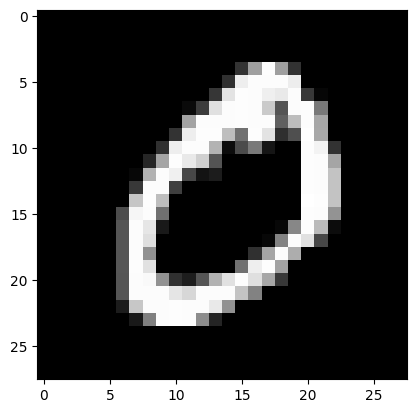

In [266]:
sample = 1
image = X_train[sample]

fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [267]:
num = 10
images = X_train[:num]
labels = y_train[:num]

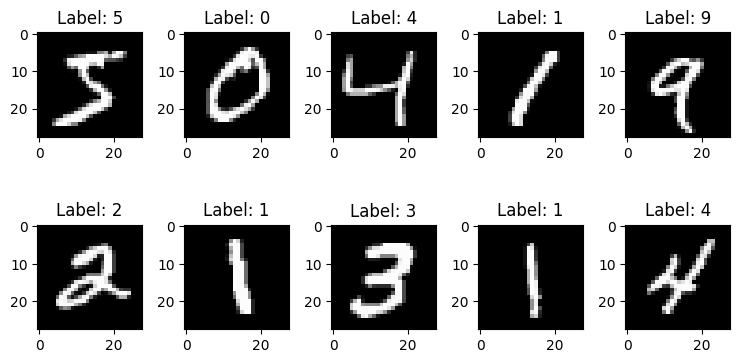

In [268]:
num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

# **Preprocessing**

In [269]:
x_train_flattened = X_train.reshape(X_train.shape[0], -1) / 255.0
x_test_flattened = X_test.reshape(X_test.shape[0], -1) / 255.0

Normalisasi Data : Gambar diubah dari rentang [0, 255] menjadi [0, 1] agar lebih mudah diproses oleh algoritma clustering.

In [313]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

## **Principal Component Analysis**

In [314]:
pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train_flattened)
x_test_pca = pca.transform(x_test_flattened)

Menggunakan Principal Component Analysis (PCA) untuk mengurangi dimensi data sebelum dilakukan clustering. Pengurangan dimensi dapat mempercepat proses clustering dan menghilangkan noise yang tidak diperlukan.

# **DBSCAN**

In [315]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(x_train_pca)

DBSCAN(eps=1.5)

Algoritma ini memerlukan dua parameter utama, yaitu eps (jarak maksimal untuk menganggap dua titik sebagai tetangga) dan min_samples (jumlah minimum tetangga yang diperlukan untuk membentuk sebuah cluster)

In [344]:
y_dbscan = dbscan.fit_predict(x_train_pca)

Setelah DBSCAN selesai, hasil clustering disimpan dalam variabel y_dbscan

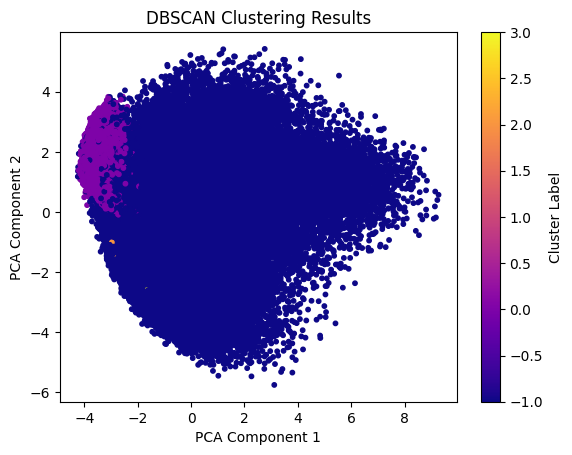

In [337]:
import matplotlib.pyplot as plt

# Assuming x_train_pca is 2D data after PCA
# and y_dbscan are the cluster labels from DBSCAN

# Plot the DBSCAN results
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_dbscan, cmap='plasma', s=10)
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [316]:
labels_train = dbscan.labels_

In [317]:
unique_labels = np.unique(labels_train)
num_clusters = len(unique_labels)

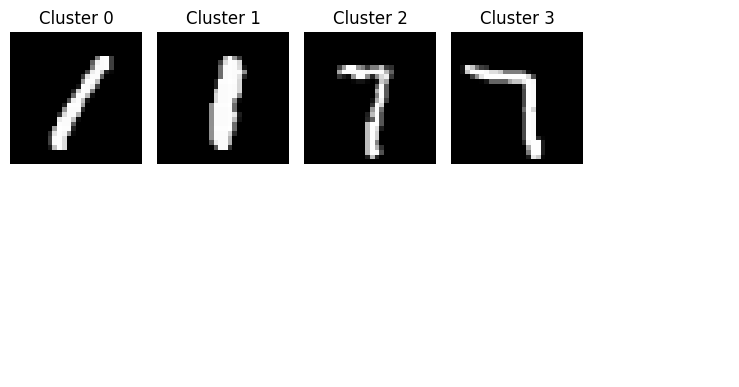

In [318]:
import matplotlib.pyplot as plt
import numpy as np

def plot_dbscan_clusters(X_train, labels_train, unique_labels, num_row=2, num_col=5):
    # Prepare plotting
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
    axes = axes.flatten()  # Flatten axes array for easier indexing

    # Plot each cluster
    for i, label in enumerate(unique_labels):
        if label == -1:  # Skip noise points
            continue
        
        # Filter images belonging to the current cluster
        cluster_images = X_train[labels_train == label]
        
        # Show one example from each cluster
        if len(cluster_images) > 0:
            ax = axes[i]
            ax.imshow(cluster_images[0], cmap='gray')
            ax.set_title(f'Cluster {label}')
            ax.axis('off')

    # Hide any extra subplots if there are fewer clusters than the number of subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Assuming X_train, labels_train, and unique_labels are already defined
unique_labels = np.unique(labels_train)
unique_labels = unique_labels[unique_labels != -1]  # Remove noise label if present

plot_dbscan_clusters(X_train, labels_train, unique_labels)

In [319]:
noise_points = sum(y_dbscan == -1)
print(f"Jumlah titik noise: {noise_points}")

Jumlah titik noise: 9965


Nilai -1 menandakan bahwa titik tersebut dianggap noise (bukan bagian dari cluster manapun). Didapatkan bahwa terdapat 9965 jumlah titik noise

In [320]:
# Filter noise (-1 label)
X_test_filtered = X_test_pca[y_dbscan != -1]
y_dbscan_filtered = y_dbscan[y_dbscan != -1]

# Hitung silhouette score
if len(set(y_dbscan_filtered)) > 1:
    score = silhouette_score(X_test_filtered, y_dbscan_filtered)
    print(f"Skor Siluet setelah mengabaikan noise: {score:.4f}")
else:
    print("Tidak cukup cluster untuk menghitung skor siluet setelah mengabaikan noise.")

Skor Siluet setelah mengabaikan noise: 0.4333


Skor 0.4333 berarti bahwa cluster yang terbentuk dari algoritma DBSCAN cukup terdefinisi dengan baik, meskipun ada tumpang tindih atau ketidakjelasan antar beberapa cluster. Ini bukan hasil yang sempurna, namun masih menunjukkan bahwa ada struktur yang dapat diidentifikasi di dalam data, meskipun noise telah diabaikan

In [331]:
ari = adjusted_rand_score(y_train, labels_train)
nmi = normalized_mutual_info_score(y_train, labels_train)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")

Adjusted Rand Index: 0.0359
Normalized Mutual Information: 0.2013


- Nilai ARI sebesar 0.0359 menunjukkan bahwa ada sedikit kesesuaian antara hasil clustering dengan label asli data. ARI mengukur kemiripan antara dua partisi (hasil clustering dan label asli) dengan memperhitungkan kemungkinan penempatan titik secara acak.
- Nilai NMI sebesar 0.2013 menunjukkan bahwa ada sebagian informasi yang saling terkait antara hasil clustering dan label asli.

Nilai ARI yang rendah (0.0359) dan NMI yang juga relatif rendah (0.2013) menunjukkan bahwa hasil clustering DBSCAN belum cukup mampu menangkap pola yang mendekati label asli dari data MNIST